In [1]:
## Import Necessary Libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error 

%matplotlib inline

In [2]:
## Read Dataset
data = pd.read_csv('data.csv')

In [3]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
## More INfo About Data
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [5]:
## Check Missing Values
data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

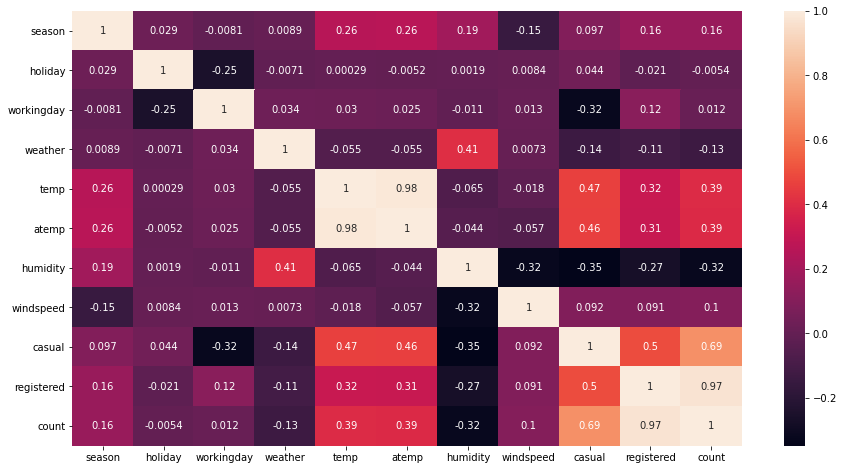

In [6]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True);

In [7]:
## Dropped unnecessary columns

data.drop(['datetime'],axis=1,inplace=True)
data.drop(['atemp'],axis=1, inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   humidity    10886 non-null  int64  
 6   windspeed   10886 non-null  float64
 7   casual      10886 non-null  int64  
 8   registered  10886 non-null  int64  
 9   count       10886 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 850.6 KB


In [9]:
X = data.iloc[:,:-1] ## Features 
y = data.iloc[:,-1] ## Target

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)


In [11]:
LinearRegression_Model = LinearRegression()
DecisionTreeRegression_Model = DecisionTreeRegressor()
RandomForestRegression_Model = RandomForestRegressor()
Xgboost_Model = XGBRegressor()

ml_models = [LinearRegression_Model, DecisionTreeRegression_Model, RandomForestRegression_Model, Xgboost_Model]

In [12]:
best_accuracies = 0.0
best_regressor = 0

model_dict = {0:'LinearRegression', 1: 'DecisionTreeRegressor', 2: 'RandomForestRegressor', 3:'XgboostRegressor'}

In [13]:
for model in ml_models:
    model.fit(X_train, y_train)

In [14]:
for i, models in enumerate(ml_models):
    print( model_dict[i], models.score(X_test, y_test)) 

LinearRegression 1.0
DecisionTreeRegressor 0.9992650625009971
RandomForestRegressor 0.9997336173422947
XgboostRegressor 0.9995792376186459


In [15]:
model = LinearRegression_Model

In [16]:
import pickle

In [17]:
pickle_out = open("model.pkl", "wb") 
pickle.dump(model, pickle_out) 
pickle_out.close()